In [1]:
%matplotlib inline

In [2]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# 2. Load the Dataset
df = pd.read_csv("Synthetic_Pages_Viewed_Only.csv")  

# Preview the data
df.head()

,Pages_Viewed,Purchase_Made
0,5,1
1,4,0
2,4,1
3,4,1
4,2,0


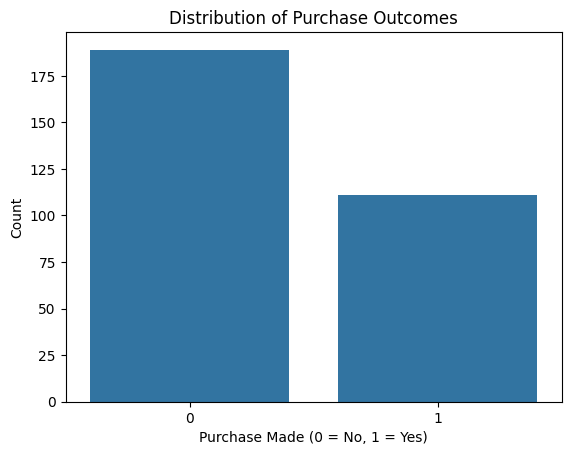

In [15]:
# 3. Exploratory Data Analysis (EDA)

# Check class balance
sns.countplot(x='Purchase_Made', data=df)
plt.title("Distribution of Purchase Outcomes")
plt.xlabel("Purchase Made (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

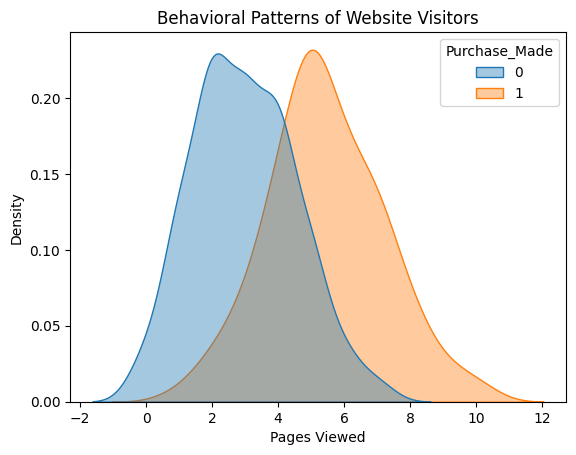

In [13]:
# KDE plot for Pages_Viewed by Purchase_Made
sns.kdeplot(data=df, x='Pages_Viewed', hue='Purchase_Made', fill=True, common_norm=False, alpha=0.4)

plt.title("Behavioral Patterns of Website Visitors")
plt.xlabel("Pages Viewed")
plt.ylabel("Density")  # ✅ Fixed label
plt.show()

In [5]:
# 4. Prepare Features and Target
X = df[['Pages_Viewed']]
y = df['Purchase_Made']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

coefficients.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
0,Pages_Viewed,0.981504


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        54
           1       0.70      0.64      0.67        36

    accuracy                           0.74        90
   macro avg       0.73      0.73      0.73        90
weighted avg       0.74      0.74      0.74        90

Confusion Matrix:


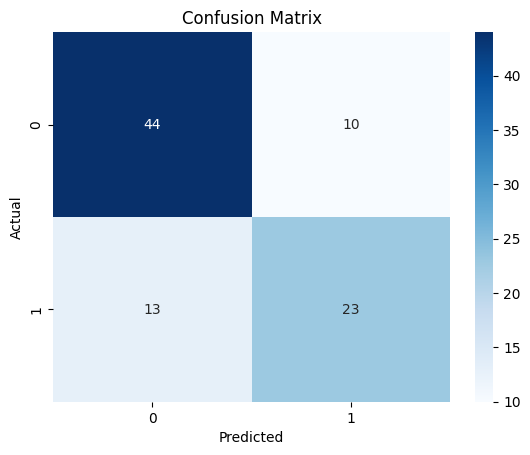

In [7]:
# 6. Evaluate the Model
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

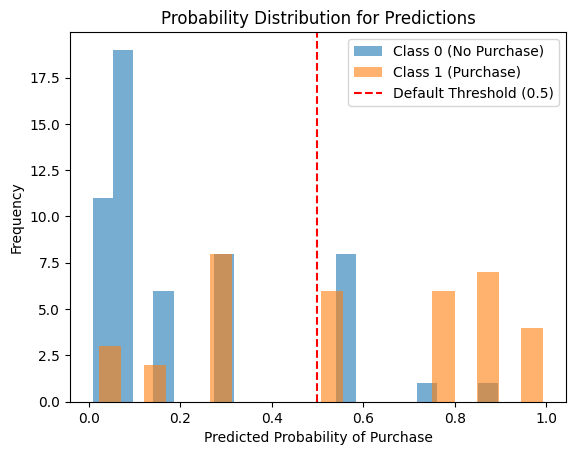

In [8]:
# 7. Probability Threshold Visualization

# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Plot the distribution of predicted probabilities
plt.hist(y_prob[y_test == 0], bins=20, alpha=0.6, label="Class 0 (No Purchase)")
plt.hist(y_prob[y_test == 1], bins=20, alpha=0.6, label="Class 1 (Purchase)")
plt.axvline(0.5, color='red', linestyle='--', label="Default Threshold (0.5)")
plt.xlabel("Predicted Probability of Purchase")
plt.ylabel("Frequency")
plt.title("Probability Distribution for Predictions")
plt.legend()
plt.show()

/Users/robbarto/Programming Projects/Pearson Live Training Repos/Oreilly-Mastering-AI-Fundamentals/Mastering_AI/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


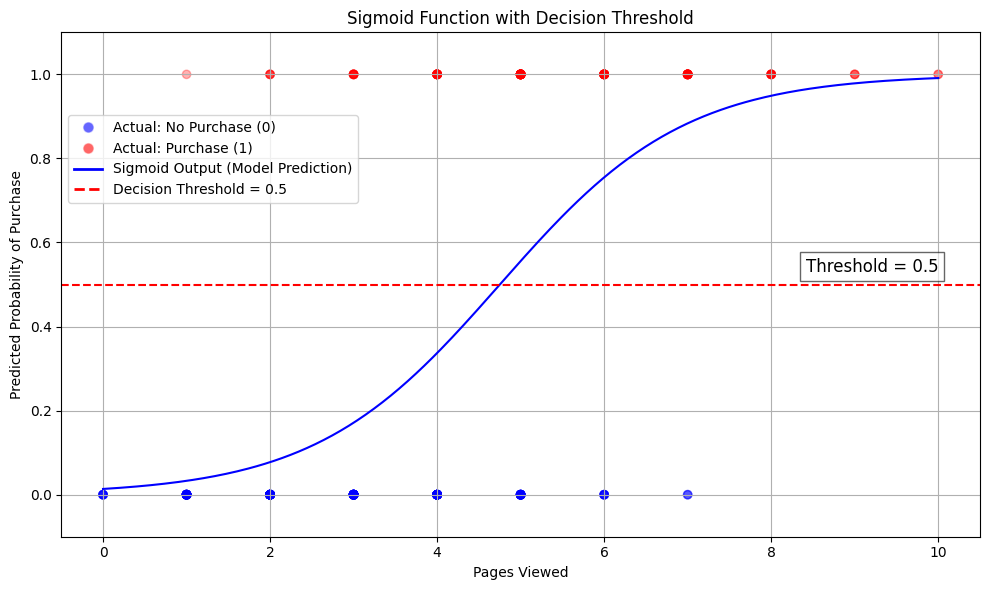

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.linear_model import LogisticRegression

# Use your existing DataFrame
X_single = df[['Pages_Viewed']]
y = df['Purchase_Made']

# Re-train model just in case
model_single = LogisticRegression()
model_single.fit(X_single, y)

# Generate sigmoid curve
x_range = np.linspace(X_single.min().values[0], X_single.max().values[0], 300).reshape(-1, 1)
probs = model_single.predict_proba(x_range)[:, 1]

# Create plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_single, y, alpha=0.3, c=y, cmap='bwr')

plt.plot(x_range, probs, color='blue', label='Sigmoid Output (P(Purchase))')
plt.axhline(0.5, color='red', linestyle='--', label='Decision Threshold = 0.5')
plt.text(x_range.max(), 0.53, 'Threshold = 0.5', ha='right', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.6))

plt.xlabel("Pages Viewed")
plt.ylabel("Predicted Probability of Purchase")
plt.title("Sigmoid Function with Decision Threshold")

plt.ylim(-0.1, 1.1)
plt.grid(True)

# Custom legend handles
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Actual: No Purchase (0)',
           markerfacecolor='blue', markersize=8, alpha=0.6),
    Line2D([0], [0], marker='o', color='w', label='Actual: Purchase (1)',
           markerfacecolor='red', markersize=8, alpha=0.6),
    Line2D([0], [0], color='blue', lw=2, label='Sigmoid Output (Model Prediction)'),
    Line2D([0], [0], color='red', linestyle='--', lw=2, label='Decision Threshold = 0.5')
]

plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0, 0.85))
plt.tight_layout()
plt.show()


/Users/robbarto/Programming Projects/Pearson Live Training Repos/Oreilly-Mastering-AI-Fundamentals/Mastering_AI/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


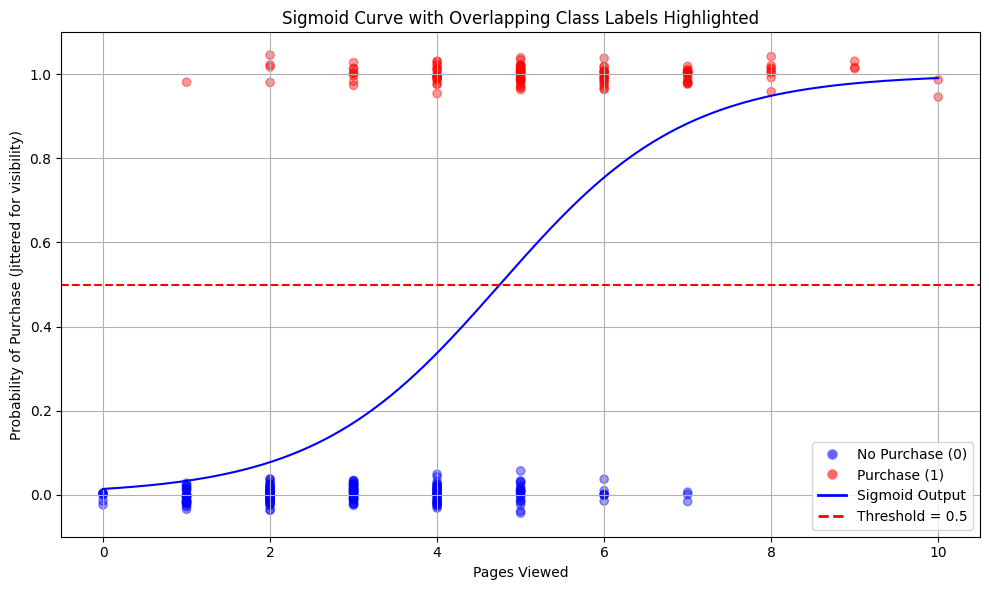

In [11]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from matplotlib.lines import Line2D

# Add vertical jitter so we can see overlapping dots
jittered_y = y + np.random.normal(0, 0.02, size=len(y))

# Re-fit on single feature
X_single = df[['Pages_Viewed']]
model_single = LogisticRegression()
model_single.fit(X_single, y)

# Generate sigmoid output
x_range = np.linspace(X_single.min().values[0], X_single.max().values[0], 300).reshape(-1, 1)
probs = model_single.predict_proba(x_range)[:, 1]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_single, jittered_y, alpha=0.4, c=y, cmap='bwr', label='Actual Data (Jittered)')
plt.plot(x_range, probs, color='blue', label='Sigmoid Output (P(Purchase))')
plt.axhline(0.5, color='red', linestyle='--', label='Decision Threshold = 0.5')

# Legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='No Purchase (0)',
           markerfacecolor='blue', markersize=8, alpha=0.6),
    Line2D([0], [0], marker='o', color='w', label='Purchase (1)',
           markerfacecolor='red', markersize=8, alpha=0.6),
    Line2D([0], [0], color='blue', lw=2, label='Sigmoid Output'),
    Line2D([0], [0], color='red', linestyle='--', lw=2, label='Threshold = 0.5'),
]

plt.xlabel("Pages Viewed")
plt.ylabel("Probability of Purchase (Jittered for visibility)")
plt.title("Sigmoid Curve with Overlapping Class Labels Highlighted")
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend(handles=legend_elements, loc='lower right')
plt.tight_layout()
plt.show()
